In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/domestic-violence-against-women/Domestic violence.csv


In [110]:
data=pd.read_csv('/kaggle/input/domestic-violence-against-women/Domestic violence.csv')

In [111]:
data.head()

,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarred,no
3,4,22,tertiary,unemployed,0,unmarred,no
4,5,50,primary,unemployed,0,married,yes


In [112]:
data.shape

(347, 7)

In [113]:
data.columns

Index(['SL. No', 'Age', 'Education ', 'Employment ', 'Income',
       'Marital status ', 'Violence '],
      dtype='object')

In [114]:
data.dtypes

SL. No              int64
Age                 int64
Education          object
Employment         object
Income              int64
Marital status     object
Violence           object
dtype: object

In [115]:
data.describe()

,SL. No,Age,Income
count,347.000000,347.000000,347.000000
mean,174.000000,31.380403,2110.685879
std,100.314505,9.601569,5743.278766
min,1.000000,15.000000,0.000000
25%,87.500000,23.000000,0.000000
50%,174.000000,30.000000,0.000000
75%,260.500000,39.500000,0.000000
max,347.000000,60.000000,35000.000000


Data preparation

In [116]:
data.head()

,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarred,no
3,4,22,tertiary,unemployed,0,unmarred,no
4,5,50,primary,unemployed,0,married,yes


****feature understanding
* plotting features
* histogram
* boxplot

In [117]:
data['Age'].value_counts()\



Age
30    25
25    21
23    20
40    17
22    17
33    15
35    15
26    15
19    14
45    13
27    13
50    13
20    13
21    12
29    12
24    12
44    11
28    10
18     9
36     8
43     7
42     7
31     6
34     5
47     5
32     5
38     4
46     4
39     3
37     3
48     2
55     2
51     2
15     2
56     1
60     1
17     1
41     1
54     1
Name: count, dtype: int64

Text(0, 0.5, 'count')

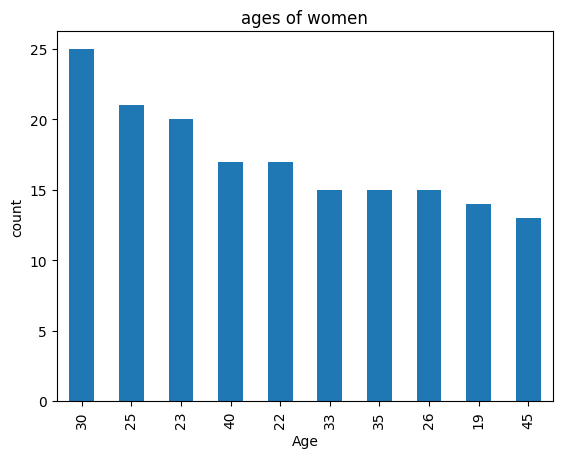

In [118]:
ax=data['Age'].value_counts()\
.head(10)\
.plot(kind='bar',title='ages of women')
ax.set_ylabel('count')

Text(0.5, 0, 'age')

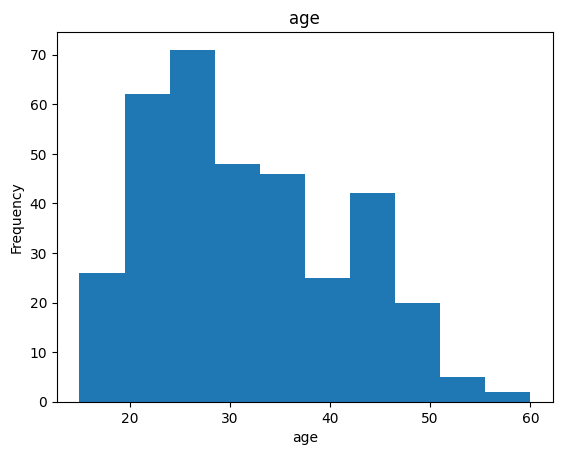

In [119]:
ax=data['Age'].plot(kind='hist',bins=10,title='age')
ax.set_xlabel('age')

Text(0.5, 0, 'age')

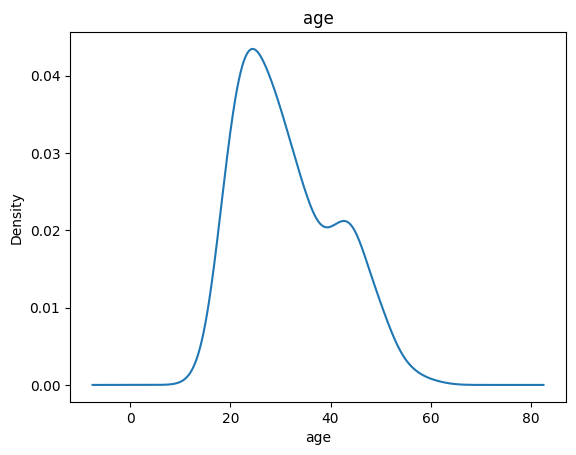

In [120]:
ax=data['Age'].plot(kind='kde',title='age')
ax.set_xlabel('age')

In [121]:
data.head()

,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarred,no
3,4,22,tertiary,unemployed,0,unmarred,no
4,5,50,primary,unemployed,0,married,yes


<Axes: title={'center': 'age vs.income'}, xlabel='Income', ylabel='Age'>

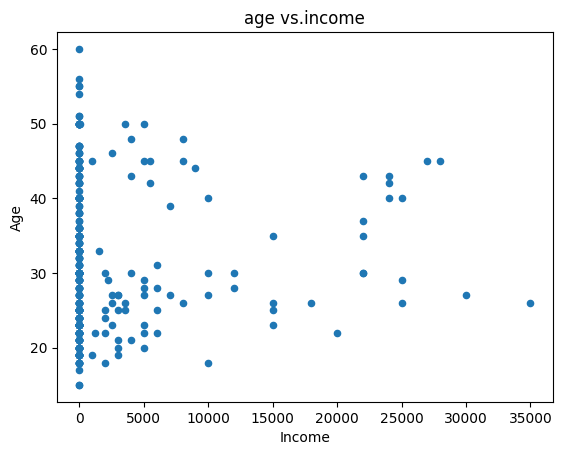

In [122]:
data.plot(kind='scatter',x='Income',y='Age',title='age vs.income')
#plt.show()

<Axes: xlabel='Income', ylabel='Age'>

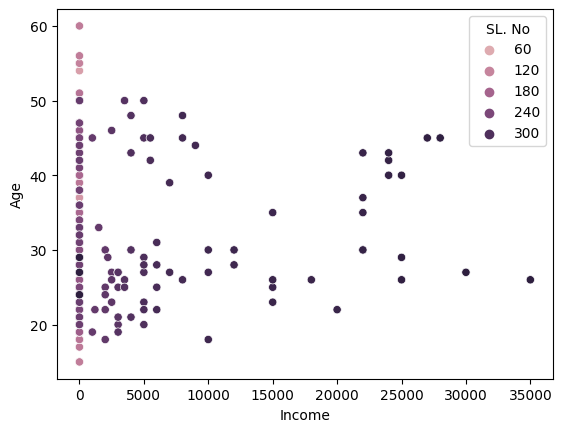

In [123]:
import seaborn as sns
sns.scatterplot(x='Income',
                y='Age',
                hue='SL. No',
                data=data)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


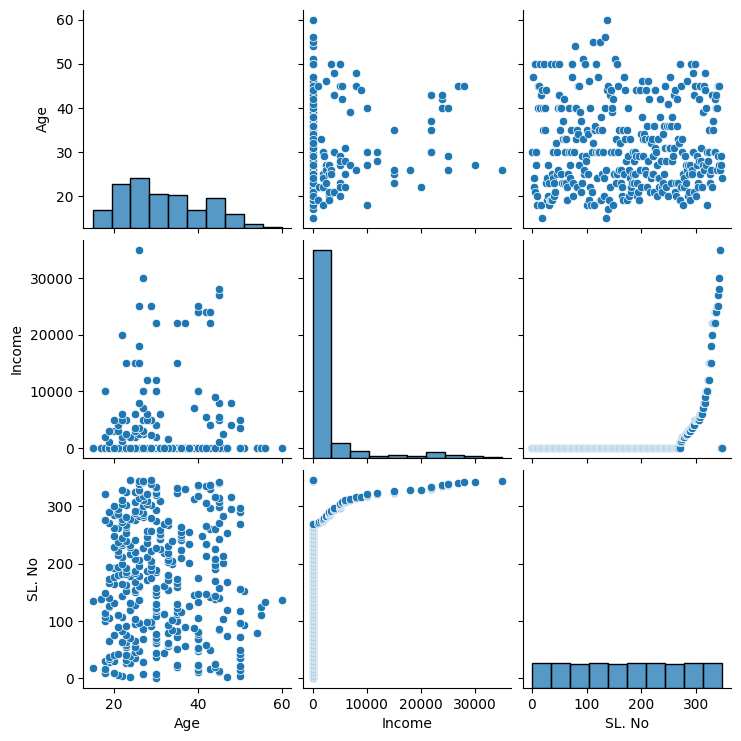

In [128]:

sns.pairplot(data,
             vars=['Age','Income','SL. No'])

In [125]:
data_corr=data[['Age','Income','SL. No']].dropna().corr()
data_corr

,Age,Income,SL. No
Age,1.000000,0.055338,-0.033848
Income,0.055338,1.000000,0.554103
SL. No,-0.033848,0.554103,1.000000


<Axes: >

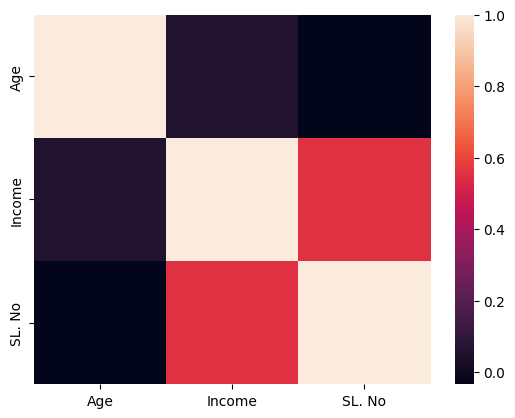

In [126]:
sns.heatmap(data_corr)

In [127]:
data.head()

,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarred,no
3,4,22,tertiary,unemployed,0,unmarred,no
4,5,50,primary,unemployed,0,married,yes
